In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2, RFE, SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import warnings
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

In [2]:
# Reading the dataset
#data = pd.read_csv('/content/Copy of speeddating.csv',na_values=["b'?'", ' '])
data = pd.read_csv('speeddating.csv', na_values=["b'?'", ' '])
#data = pd.read_csv('/content/drive/MyDrive/CS513Project/speeddating.csv',na_values=["b'?'", ' '])

In [3]:
data.head()

has_null  wave     gender   age  age_o  d_age   d_d_age  \
0      b''   1.0  b'female'  21.0   27.0    6.0  b'[4-6]'   
1      b''   1.0  b'female'  21.0   22.0    1.0  b'[0-1]'   
2      b''   1.0  b'female'  21.0   22.0    1.0  b'[0-1]'   
3      b''   1.0  b'female'  21.0   23.0    2.0  b'[2-3]'   
4      b''   1.0  b'female'  21.0   24.0    3.0  b'[2-3]'   

                                       race  \
0  b'Asian/Pacific Islander/Asian-American'   
1  b'Asian/Pacific Islander/Asian-American'   
2  b'Asian/Pacific Islander/Asian-American'   
3  b'Asian/Pacific Islander/Asian-American'   
4  b'Asian/Pacific Islander/Asian-American'   

                                     race_o samerace  ...  \
0            b'European/Caucasian-American'     b'0'  ...   
1            b'European/Caucasian-American'     b'0'  ...   
2  b'Asian/Pacific Islander/Asian-American'     b'1'  ...   
3            b'European/Caucasian-American'     b'0'  ...   
4               b'Latino/Hispanic American'     b'0'  ...   

   d_expected_num_interested_in_me  d_expected_num_matches like  \
0                         b'[0-3]'                b'[3-5]'  7.0   
1                         b'[0-3]'                b'[3-5]'  7.0   
2                         b'[0-3]'                b'[3-5]'  7.0   
3                         b'[0-3]'                b'[3-5]'  7.0   
4                         b'[0-3]'                b'[3-5]'  6.0   

  guess_prob_liked    d_like  d_guess_prob_liked  met  decision  decision_o  \
0              6.0  b'[6-8]'            b'[5-6]'  0.0      b'1'        b'0'   
1              5.0  b'[6-8]'            b'[5-6]'  1.0      b'1'        b'0'   
2              NaN  b'[6-8]'            b'[0-4]'  1.0      b'1'        b'1'   
3              6.0  b'[6-8]'            b'[5-6]'  0.0      b'1'        b'1'   
4              6.0  b'[6-8]'            b'[5-6]'  0.0      b'1'        b'1'   

   match  
0   b'0'  
1   b'0'  
2   b'1'  
3   b'1'  
4   b'1'  

[5 rows x 123 columns]

# Data Cleaning

In [4]:
#dropping has_null column since it is has no significance
data.has_null.unique()
data.drop(['has_null'], axis = 1, inplace= True)

In [5]:
#Printing columns with % null values
null_counts=data.isnull().sum().sort_values(ascending=False)
for column, null_count in null_counts.items():
    if null_count > 0:
        print(f"{column}: {round((null_count/data.shape[0])*100,2)}")

expected_num_interested_in_me: 78.52
expected_num_matches: 14.0
shared_interests_o: 12.84
shared_interests_partner: 12.74
ambitous_o: 8.62
ambition_partner: 8.5
met: 4.48
funny_o: 4.3
funny_partner: 4.18
guess_prob_liked: 3.69
intelligence_o: 3.65
intelligence_partner: 3.53
sinsere_o: 3.43
sincere_partner: 3.31
like: 2.86
attractive_o: 2.53
attractive_partner: 2.41
interests_correlate: 1.89
pref_o_shared_interests: 1.54
shared_interests_important: 1.44
pref_o_ambitious: 1.28
attractive: 1.25
sincere: 1.25
intelligence: 1.25
funny: 1.25
ambition: 1.25
age_o: 1.24
expected_happy_with_sd_people: 1.21
ambtition_important: 1.18
pref_o_funny: 1.17
age: 1.13
pref_o_intelligence: 1.06
pref_o_sincere: 1.06
funny_important: 1.06
pref_o_attractive: 1.06
museums: 0.94
yoga: 0.94
shopping: 0.94
music: 0.94
importance_same_race: 0.94
importance_same_religion: 0.94
sports: 0.94
tvsports: 0.94
exercise: 0.94
dining: 0.94
movies: 0.94
reading: 0.94
attractive_important: 0.94
theater: 0.94
tv: 0.94
hiki

<Axes: >

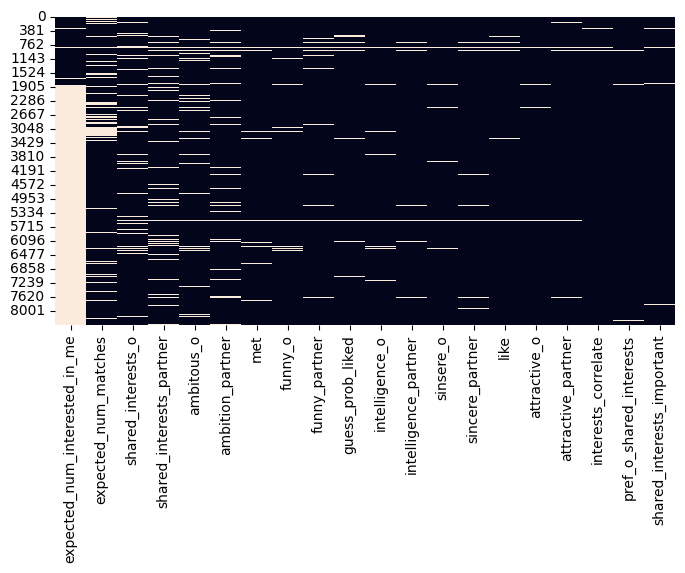

In [6]:
# getting to 20 missing value columns
top_20_missing_columns = []
null_counts=data.isnull().sum().sort_values(ascending=False)
count=0
for column, null_count in null_counts.items():
    if null_count > 0 and count<20:
        top_20_missing_columns.append(column)
        count+=1
        
df_top_20_missing_columns = data[top_20_missing_columns]

plt.figure(figsize=(8, 4))
sns.heatmap(df_top_20_missing_columns.isnull(), cbar=False)

<Figure size 1000x600 with 0 Axes>

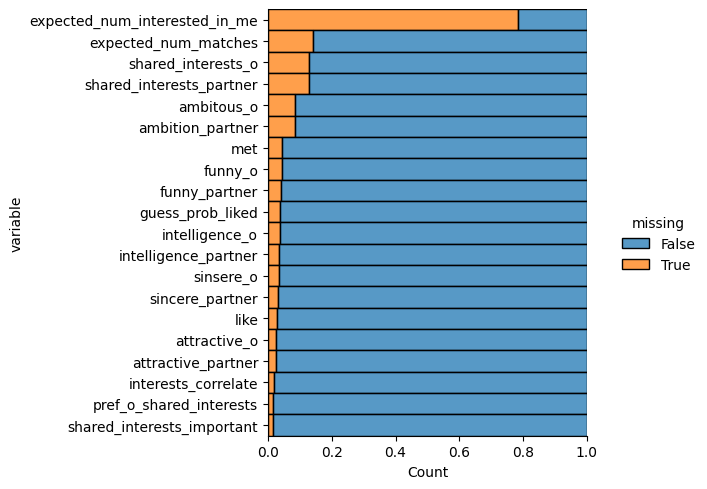

In [7]:
plt.figure(figsize=(10,6))
sns.displot(
    data=df_top_20_missing_columns.isna().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    aspect=1.25
)
plt.savefig("visualizing_missing_data_with_barplot_Seaborn_distplot.png", dpi=100)

In [8]:
# If there are more missing values than 15% of the dataset count, drop the columns

temp = []
print('Dropped:')
for col in data.columns:
    if (data[col].isnull().sum()) >= (data.shape[0] *15 / 100):
        print(col, str(data[col].isnull().sum()))
        temp.append(col)

data = data.drop(temp, axis=1)

Dropped:
expected_num_interested_in_me 6578


In [9]:
# All columns with 'd_' except 'd_age' convert values to set ranges. Let's get rid of those columns

temp = []
print('Dropped:')

for col in data.columns:
    if col == 'd_age':
        continue
    if col.startswith('d_'):
        temp.append(col)
        print(col)
        
data = data.drop(temp, axis=1)

Dropped:
d_d_age
d_importance_same_race
d_importance_same_religion
d_pref_o_attractive
d_pref_o_sincere
d_pref_o_intelligence
d_pref_o_funny
d_pref_o_ambitious
d_pref_o_shared_interests
d_attractive_o
d_sinsere_o
d_intelligence_o
d_funny_o
d_ambitous_o
d_shared_interests_o
d_attractive_important
d_sincere_important
d_intellicence_important
d_funny_important
d_ambtition_important
d_shared_interests_important
d_attractive
d_sincere
d_intelligence
d_funny
d_ambition
d_attractive_partner
d_sincere_partner
d_intelligence_partner
d_funny_partner
d_ambition_partner
d_shared_interests_partner
d_sports
d_tvsports
d_exercise
d_dining
d_museums
d_art
d_hiking
d_gaming
d_clubbing
d_reading
d_tv
d_theater
d_movies
d_concerts
d_music
d_shopping
d_yoga
d_interests_correlate
d_expected_happy_with_sd_people
d_expected_num_interested_in_me
d_expected_num_matches
d_like
d_guess_prob_liked


In [10]:
#imputing remaining null values with median
null_counts_revised=data.isnull().sum()

for column, null_count in null_counts_revised.items():
    if null_count > 0:
        print(f"{column}: {null_count}")

age: 95
age_o: 104
race: 63
race_o: 73
importance_same_race: 79
importance_same_religion: 79
field: 63
pref_o_attractive: 89
pref_o_sincere: 89
pref_o_intelligence: 89
pref_o_funny: 98
pref_o_ambitious: 107
pref_o_shared_interests: 129
attractive_o: 212
sinsere_o: 287
intelligence_o: 306
funny_o: 360
ambitous_o: 722
shared_interests_o: 1076
attractive_important: 79
sincere_important: 79
intellicence_important: 79
funny_important: 89
ambtition_important: 99
shared_interests_important: 121
attractive: 105
sincere: 105
intelligence: 105
funny: 105
ambition: 105
attractive_partner: 202
sincere_partner: 277
intelligence_partner: 296
funny_partner: 350
ambition_partner: 712
shared_interests_partner: 1067
sports: 79
tvsports: 79
exercise: 79
dining: 79
museums: 79
art: 79
hiking: 79
gaming: 79
clubbing: 79
reading: 79
tv: 79
theater: 79
movies: 79
concerts: 79
music: 79
shopping: 79
yoga: 79
interests_correlate: 158
expected_happy_with_sd_people: 101
expected_num_matches: 1173
like: 240
guess

In [11]:
# Replace null values with median for numeric columns and highest frequency for object type columns

for col in data.columns:
    if data[col].dtype == 'float64':
        data[col] = data[col].fillna(data[col].median())
    else:
        temp = data[col].value_counts().to_dict()
        print(col)
        print(temp)
        data[col] = data[col].fillna((list(temp.keys())[list(temp.values()).index(data[col].value_counts().max())]))

gender
{"b'male'": 4194, "b'female'": 4184}
race
{"b'European/Caucasian-American'": 4727, "b'Asian/Pacific Islander/Asian-American'": 1982, "b'Latino/Hispanic American'": 664, "b'Other'": 522, "b'Black/African American'": 420}
race_o
{"b'European/Caucasian-American'": 4722, "b'Asian/Pacific Islander/Asian-American'": 1978, "b'Latino/Hispanic American'": 664, "b'Other'": 521, "b'Black/African American'": 420}
samerace
{"b'0'": 5062, "b'1'": 3316}
field
{"b'Business'": 521, "b'MBA'": 468, "b'Law'": 462, "b'Social Work'": 378, "b'International Affairs'": 252, "b'Electrical Engineering'": 164, "b'Psychology'": 139, "b'law'": 123, "b'Finance'": 113, "b'business'": 110, "b'Mathematics'": 95, "b'Film'": 92, "b'Sociology'": 88, "b'Biology'": 85, "b'Engineering'": 81, "b'Business [MBA]'": 77, "b'Clinical Psychology'": 76, "b'Biochemistry'": 70, "b'Political Science'": 69, "b'Economics'": 67, "b'chemistry'": 57, "b'Physics'": 56, "b'Operations Research'": 56, "b'School Psychology'": 56, "b'Educa

In [12]:
#Checking null values now.
null_counts_revised=data.isnull().sum()

for column, null_count in null_counts_revised.items():
    if null_count > 0:
        print(f"{column}: {null_count}")

In [13]:
# Slice the string for every object to remove the b''

for col in data:
    if data[col].dtype != 'float64':
        og = data[col].unique()
        rep = []
        for val in og:
            rep.append(str(val)[2:-1])
            
        data[col].replace(og, rep, inplace=True)
        
data.head()

wave  gender   age  age_o  d_age                                   race  \
0   1.0  female  21.0   27.0    6.0  Asian/Pacific Islander/Asian-American   
1   1.0  female  21.0   22.0    1.0  Asian/Pacific Islander/Asian-American   
2   1.0  female  21.0   22.0    1.0  Asian/Pacific Islander/Asian-American   
3   1.0  female  21.0   23.0    2.0  Asian/Pacific Islander/Asian-American   
4   1.0  female  21.0   24.0    3.0  Asian/Pacific Islander/Asian-American   

                                  race_o samerace  importance_same_race  \
0            European/Caucasian-American        0                   2.0   
1            European/Caucasian-American        0                   2.0   
2  Asian/Pacific Islander/Asian-American        1                   2.0   
3            European/Caucasian-American        0                   2.0   
4               Latino/Hispanic American        0                   2.0   

   importance_same_religion  ... yoga  interests_correlate  \
0                       4.0  ...  1.0                 0.14   
1                       4.0  ...  1.0                 0.54   
2                       4.0  ...  1.0                 0.16   
3                       4.0  ...  1.0                 0.61   
4                       4.0  ...  1.0                 0.21   

   expected_happy_with_sd_people  expected_num_matches  like  \
0                            3.0                   4.0   7.0   
1                            3.0                   4.0   7.0   
2                            3.0                   4.0   7.0   
3                            3.0                   4.0   7.0   
4                            3.0                   4.0   6.0   

   guess_prob_liked  met  decision  decision_o  match  
0               6.0  0.0         1           0      0  
1               5.0  1.0         1           0      0  
2               5.0  1.0         1           1      1  
3               6.0  0.0         1           1      1  
4               6.0  0.0         1           1      1  

[5 rows x 66 columns]

# Exploratory data analysis



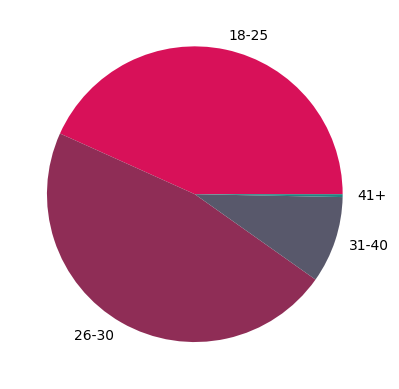

In [14]:
# Divide the age into common age ranges to observe demographics in pie chart
age_pie = {}
age_pie['18-25'] = 0
age_pie['26-30'] = 0
age_pie['31-40'] = 0
age_pie['41+'] = 0

for val in data['age']:
    if val <= 25:
        age_pie['18-25'] += 1
    elif val <=30:
        age_pie['26-30'] += 1
    elif val <= 40:
        age_pie['31-40'] += 1
    else:
        age_pie['41+'] += 1
        
lab = []
sizes = []
for x, y in age_pie.items():
    lab.append(x)
    sizes.append(y)

_ = plt.pie(sizes, labels= lab,colors=['#d81159', '#8f2d56', '#58586B', '#218380', '#8E9A5E', '#fbb13c'])

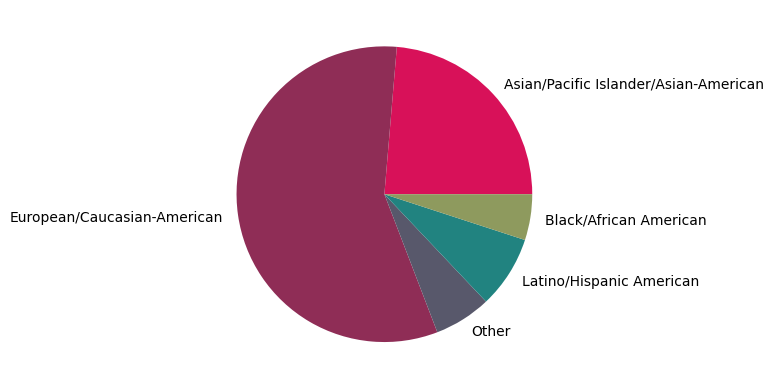

In [15]:
# View pie chart of races participating
temp = data['race'].value_counts()
lab = []
sizes = []

for i in range(len(data['race'].unique())):
    lab.append(data['race'].unique()[i])
    sizes.append(temp[data['race'].unique()[i]])

_ = plt.pie(sizes, labels=lab, colors=['#d81159', '#8f2d56', '#58586B', '#218380', '#8E9A5E', '#fbb13c'])

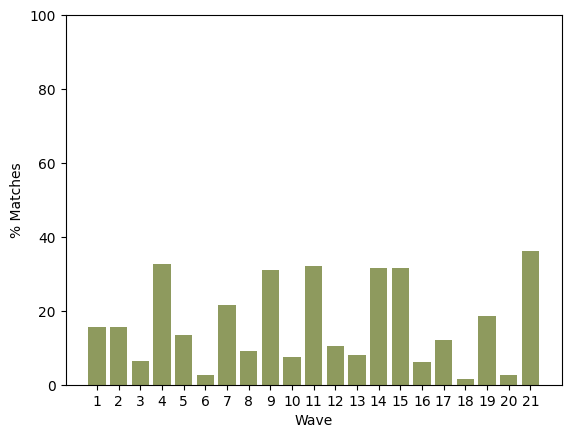

In [16]:
# View bar chart of % matches in each wave

df_temp = data[['wave', 'decision']]

temp = {}

for val in range(data.shape[0]):
    if data['wave'][val] in temp:
        temp[data['wave'][val]] += int(data['match'][val])
    else:
        temp[data['wave'][val]] = int(data['match'][val])

wave_size = data.shape[0] / len(temp)

for key, label in temp.items():
    temp[key] = (label / wave_size) * 100
        
lab = []
sizes = []

for x, y in temp.items():
    lab.append(x)
    sizes.append(y)

plt.bar(lab, sizes, color = '#8E9A5E')
plt.xticks(lab)
plt.xlabel('Wave')
plt.ylabel('% Matches')
plt.ylim(0, 100)
plt.show()

<Figure size 800x800 with 0 Axes>

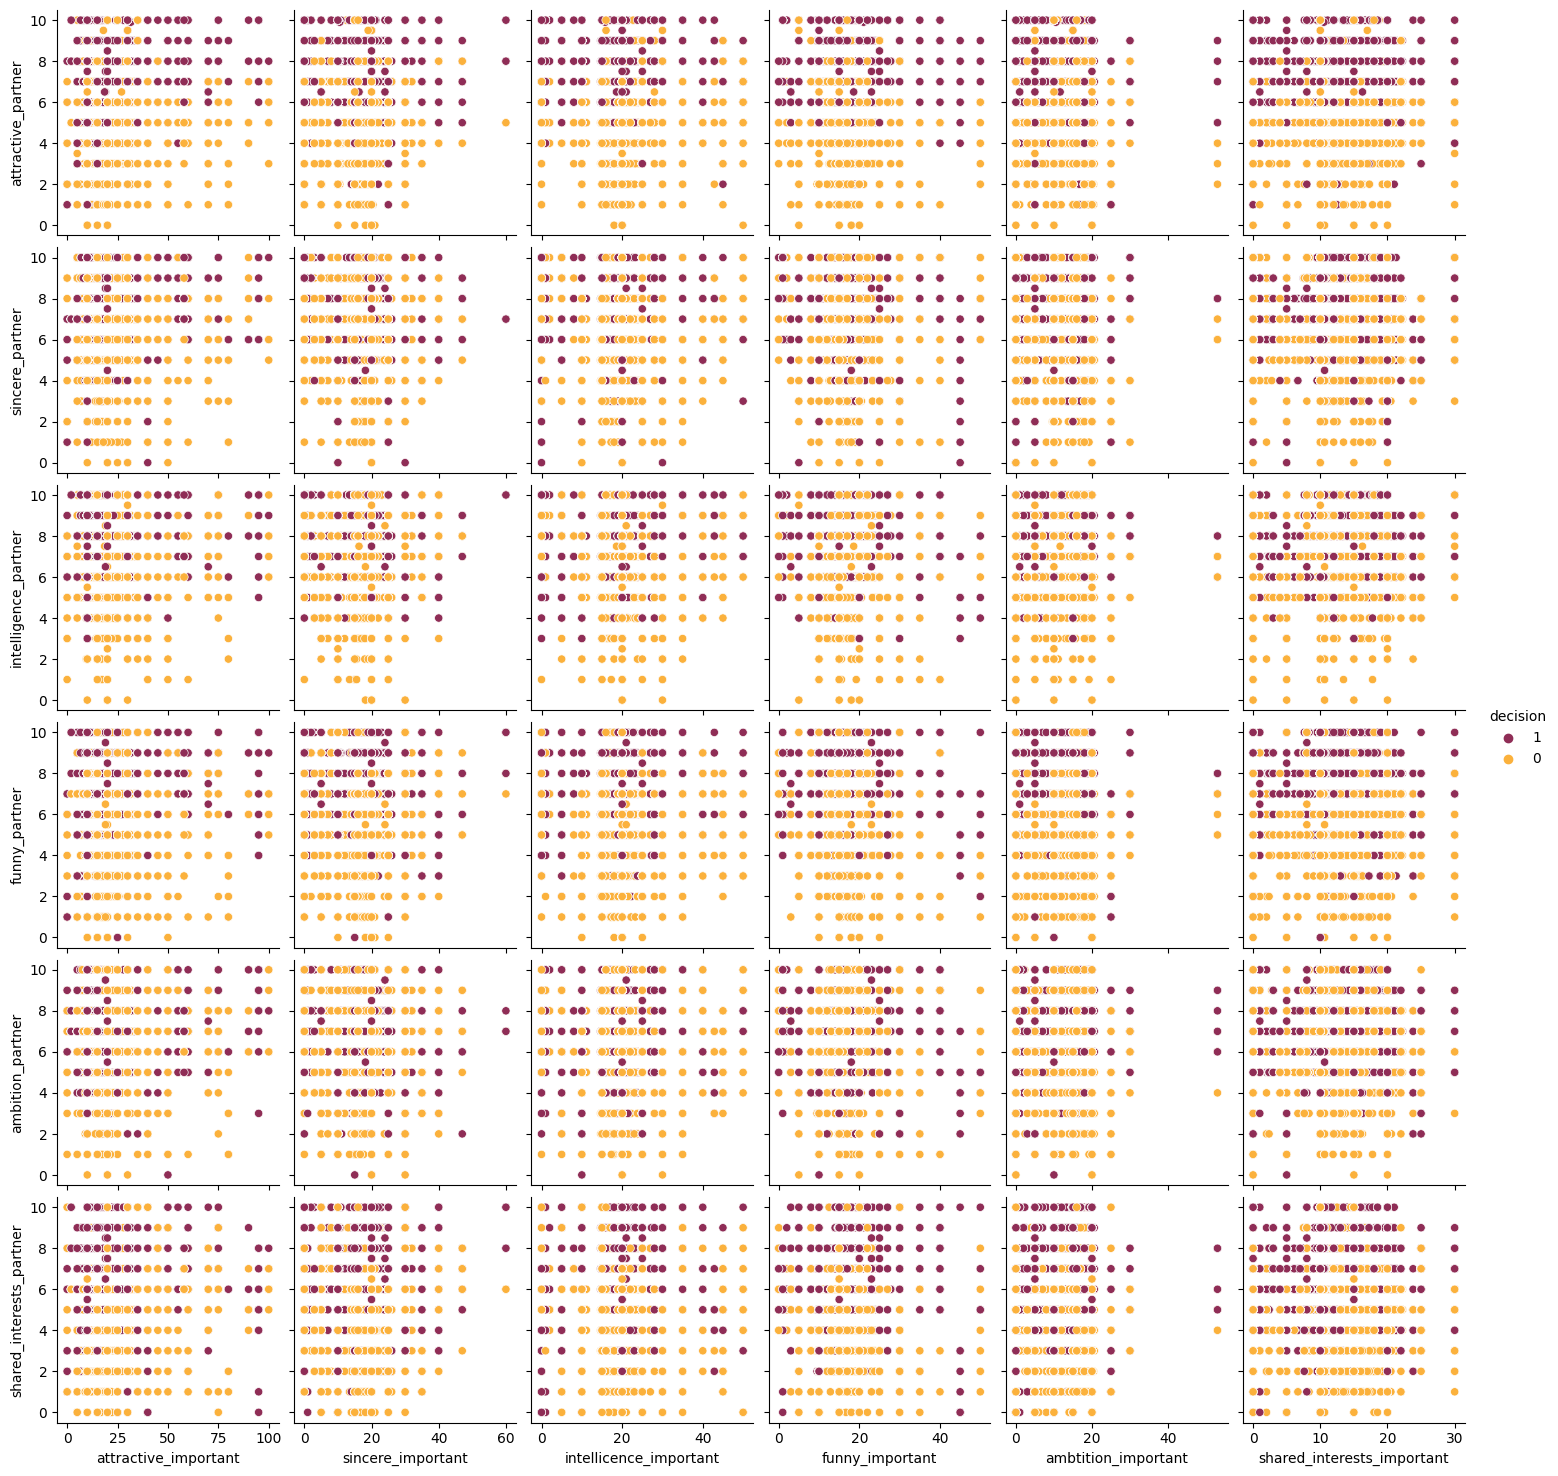

In [17]:
# Importance vs. rating
# Is a good rating + high importance guarantee of a match?
# Is a low rating + low importance guarantee of a match?

pal = sns.color_palette(['#8F2D56','#FBB13C'])

x = ['attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 'ambtition_important',
     'shared_interests_important']
y = ['attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner',
     'shared_interests_partner']

plt.figure(figsize=(8, 8))
sns.pairplot(data, x_vars = x, y_vars = y, hue = 'decision', palette = pal)

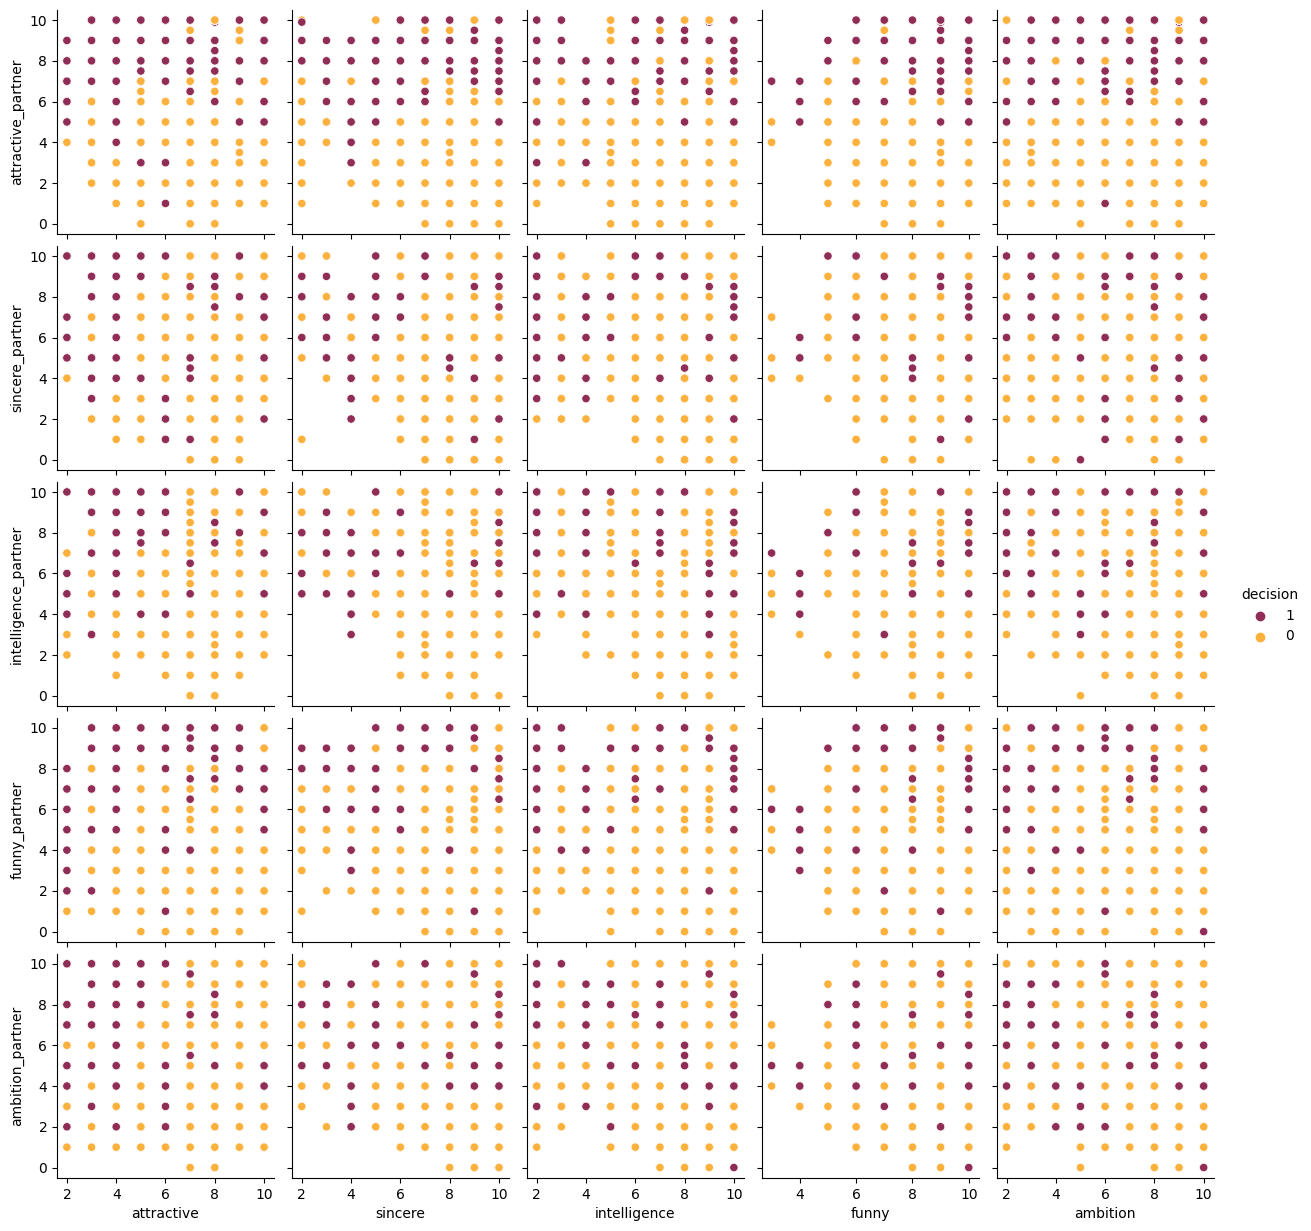

In [18]:
# Is high rating on qualities of self + high rating on qualities of partner indicative of a match?
# We can remove this. Please check!!!!!!!!
x = ['attractive', 'sincere', 'intelligence', 'funny', 'ambition']
y = ['attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner']

sns.pairplot(data, x_vars = x, y_vars = y, hue = 'decision', palette = pal)

<Axes: xlabel='gender', ylabel='attractive_important'>

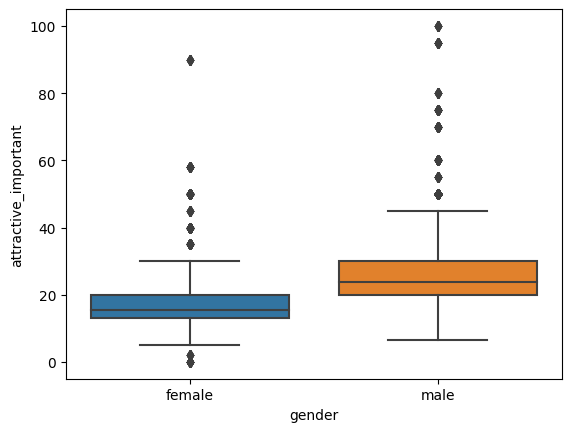

In [19]:
# Plot a boxplot of attractiveness by gender
sns.boxplot(data=data, x='gender', y='attractive_important')

<Axes: xlabel='gender', ylabel='funny_important'>

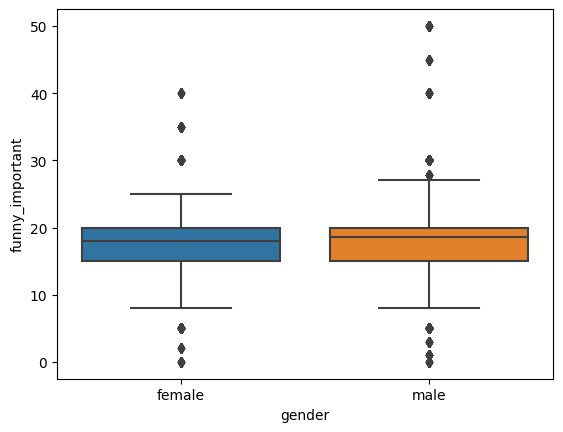

In [20]:
# Plot a boxplot of funniness by gender
sns.boxplot(data=data, x='gender', y='funny_important')

<Axes: xlabel='gender', ylabel='intellicence_important'>

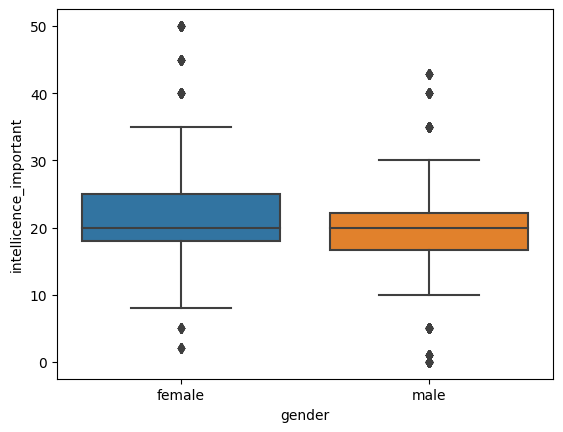

In [21]:
# Plot a boxplot of funniness by gender
sns.boxplot(data=data, x='gender', y='intellicence_important')

<Axes: xlabel='gender', ylabel='ambtition_important'>

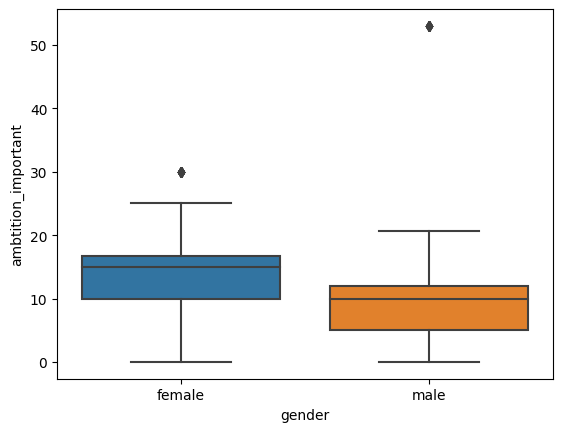

In [22]:
# Plot a boxplot of funniness by gender
sns.boxplot(data=data, x='gender', y='ambtition_important')

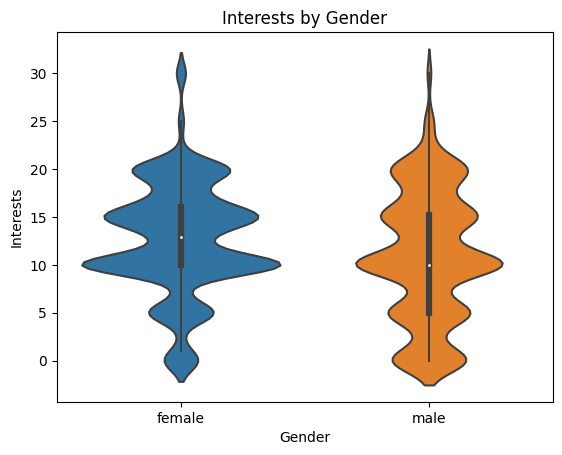

In [23]:
# Create a violin plot of the distribution of shared_interests_important by gender
sns.violinplot(x='gender', y='shared_interests_important', data=data)
plt.title("Interests by Gender")
plt.xlabel("Gender")
plt.ylabel("Interests")
plt.show()

# Encoding and Scaling

In [24]:
'''# Dropping decision and descision_o since they are dependent on match column
data.drop(['decision_o','decision'], axis = 1, inplace = True)'''

"# Dropping decision and descision_o since they are dependent on match column\ndata.drop(['decision_o','decision'], axis = 1, inplace = True)"

In [25]:
# Convert object classes into ordinal codes

for col in data.columns:
    if data[col].dtype == 'object':
        oe = OrdinalEncoder()
        oe.fit(data[[col]])
        data[col] = oe.fit_transform(data[[col]])

In [26]:
data.head()

wave  gender   age  age_o  d_age  race  race_o  samerace  \
0   1.0     0.0  21.0   27.0    6.0   0.0     2.0       0.0   
1   1.0     0.0  21.0   22.0    1.0   0.0     2.0       0.0   
2   1.0     0.0  21.0   22.0    1.0   0.0     0.0       1.0   
3   1.0     0.0  21.0   23.0    2.0   0.0     2.0       0.0   
4   1.0     0.0  21.0   24.0    3.0   0.0     3.0       0.0   

   importance_same_race  importance_same_religion  ...  yoga  \
0                   2.0                       4.0  ...   1.0   
1                   2.0                       4.0  ...   1.0   
2                   2.0                       4.0  ...   1.0   
3                   2.0                       4.0  ...   1.0   
4                   2.0                       4.0  ...   1.0   

   interests_correlate  expected_happy_with_sd_people  expected_num_matches  \
0                 0.14                            3.0                   4.0   
1                 0.54                            3.0                   4.0   
2                 0.16                            3.0                   4.0   
3                 0.61                            3.0                   4.0   
4                 0.21                            3.0                   4.0   

   like  guess_prob_liked  met  decision  decision_o  match  
0   7.0               6.0  0.0       1.0         0.0    0.0  
1   7.0               5.0  1.0       1.0         0.0    0.0  
2   7.0               5.0  1.0       1.0         1.0    1.0  
3   7.0               6.0  0.0       1.0         1.0    1.0  
4   6.0               6.0  0.0       1.0         1.0    1.0  

[5 rows x 66 columns]

In [27]:
# Drop last two columns since they are not considered in the machine learning codes

data = data.drop(['decision_o', 'match'], axis = 1)

In [28]:
# Divide the data into features and target

X = data.drop(columns = 'decision')  #independent columns
y = data.iloc[:,-1]    #target column 

In [29]:
# Normalize the features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Feature Selection Methodologies

In [30]:
# Pearson Correlation

np.random.seed(20)

def cor_selector(X, y, num_feats):
    cor_list = []
    feature_name = X.columns.tolist()

    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)

    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]

    # feature name
    cor_feature = X.iloc[:, np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()

    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X, y, len(X.columns))
print(str(len(cor_feature)), 'selected features')
cor_feature.reverse()

63 selected features


In [31]:
k_best_features = 15

In [32]:
# Apply SelectKBest class to extract top k best features

np.random.seed(20)

bestfeatures = SelectKBest(score_func = chi2, k = k_best_features)
fit = bestfeatures.fit(X_scaled, y)

chi_support = fit.get_support()
chi_feature = X.loc[:, chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')

15 selected features


In [33]:
# Using RFE

np.random.seed(20)

rfe_selector = RFE(estimator = LogisticRegression(), n_features_to_select = k_best_features, step = 10, verbose = 5)
rfe_selector.fit(X_scaled, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:, rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')

Fitting estimator with 63 features.
Fitting estimator with 53 features.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 43 features.


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Fitting estimator with 33 features.
Fitting estimator with 23 features.
15 selected features


In [34]:
# Logistic Regression to select k best features

np.random.seed(20)
embeded_lr_selector = SelectFromModel(LogisticRegression(penalty = 'l1', solver = 'liblinear'), max_features = k_best_features)
embeded_lr_selector.fit(X_scaled, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:, embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

15 selected features


In [35]:
# Random Forest to select k best features

np.random.seed(20)
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators = 100), max_features = k_best_features)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
print(len(embeded_rf_support))
embeded_rf_feature = X.loc[:, embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

63
8 selected features


In [36]:
# Combine selections

feature_selection_df = pd.DataFrame({'Feature': X.columns.tolist(), 'Pearson': cor_support, 'Chi-2': chi_support, 'RFE': rfe_support,
                                     'Logistics': embeded_lr_support, 'RandomForest': embeded_rf_support})

# count the selected times for each feature
feature_selection_df['Total'] = np.sum(feature_selection_df, axis = 1)

# display the top 100
feature_selection_df = feature_selection_df.sort_values(['Total'] , ascending = False)
feature_selection_df.index = range(1, len(feature_selection_df) + 1)
feature_selection_df.head(20)

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return reduction(axis=axis, out=out, **passkwargs)


Feature  Pearson  Chi-2    RFE  Logistics  RandomForest  \
1   shared_interests_partner     True   True   True       True          True   
2           guess_prob_liked     True   True   True       True          True   
3                       like     True   True   True       True          True   
4       expected_num_matches     True   True   True       True          True   
5         attractive_partner     True   True   True       True          True   
6              funny_partner     True   True   True       True          True   
7           ambition_partner     True   True   True       True         False   
8            sincere_partner     True   True   True       True         False   
9               attractive_o     True  False   True       True         False   
10                     funny     True  False   True       True         False   
11              intelligence     True  False   True       True         False   
12                     d_age     True  False   True       True         False   
13                attractive     True  False   True       True         False   
14      attractive_important     True  False  False       True         False   
15                    sports     True  False   True      False         False   
16      intelligence_partner     True   True  False      False         False   
17                    gaming     True   True  False      False         False   
18                    movies     True  False  False       True         False   
19       interests_correlate     True  False  False      False          True   
20                    gender     True   True  False      False         False   

    Total  
1       5  
2       5  
3       5  
4       5  
5       5  
6       5  
7       4  
8       4  
9       3  
10      3  
11      3  
12      3  
13      3  
14      2  
15      2  
16      2  
17      2  
18      2  
19      2  
20      2

In [37]:
# Select only the top 15 features selected by a combination of all the models

top_15_only = feature_selection_df['Feature'].values.tolist()[0:15]

In [38]:
top_15_only

['shared_interests_partner',
 'guess_prob_liked',
 'like',
 'expected_num_matches',
 'attractive_partner',
 'funny_partner',
 'ambition_partner',
 'sincere_partner',
 'attractive_o',
 'funny',
 'intelligence',
 'd_age',
 'attractive',
 'attractive_important',
 'sports']

In [39]:
# Select only the top 15 features to keep in X

X_top = X[top_15_only]
scaler = MinMaxScaler()
X_scaled_15 = scaler.fit_transform(X_top)
X_scaled_15 = pd.DataFrame(X_scaled_15, columns = top_15_only)

In [40]:
X_scaled_15

shared_interests_partner  guess_prob_liked  like  expected_num_matches  \
0                          0.5               0.6   0.7              0.222222   
1                          0.6               0.5   0.7              0.222222   
2                          0.7               0.5   0.7              0.222222   
3                          0.8               0.6   0.7              0.222222   
4                          0.6               0.6   0.6              0.222222   
...                        ...               ...   ...                   ...   
8373                       0.6               0.5   0.2              0.166667   
8374                       0.6               0.4   0.4              0.166667   
8375                       0.6               0.5   0.6              0.166667   
8376                       0.5               0.5   0.5              0.166667   
8377                       0.1               0.5   0.4              0.166667   

      attractive_partner  funny_partner  ambition_partner  sincere_partner  \
0                    0.6            0.7               0.6              0.9   
1                    0.7            0.8               0.5              0.8   
2                    0.5            0.8               0.5              0.8   
3                    0.7            0.7               0.6              0.6   
4                    0.5            0.7               0.6              0.6   
...                  ...            ...               ...              ...   
8373                 0.3            0.5               0.7              0.5   
8374                 0.4            0.4               0.4              0.6   
8375                 0.4            0.8               0.8              0.7   
8376                 0.4            0.4               0.7              0.6   
8377                 0.3            0.4               0.8              0.7   

      attractive_o     funny  intelligence     d_age  attractive  \
0         0.571429  0.714286          0.75  0.162162        0.50   
1         0.666667  0.714286          0.75  0.027027        0.50   
2         0.952381  0.714286          0.75  0.027027        0.50   
3         0.666667  0.714286          0.75  0.054054        0.50   
4         0.761905  0.714286          0.75  0.081081        0.50   
...            ...       ...           ...       ...         ...   
8373      0.952381  0.571429          0.50  0.027027        0.75   
8374      0.571429  0.571429          0.50  0.027027        0.75   
8375      0.190476  0.571429          0.50  0.108108        0.75   
8376      0.476190  0.571429          0.50  0.081081        0.75   
8377      0.761905  0.571429          0.50  0.081081        0.75   

      attractive_important    sports  
0                     0.15  0.888889  
1                     0.15  0.888889  
2                     0.15  0.888889  
3                     0.15  0.888889  
4                     0.15  0.888889  
...                    ...       ...  
8373                  0.70  0.777778  
8374                  0.70  0.777778  
8375                  0.70  0.777778  
8376                  0.70  0.777778  
8377                  0.70  0.777778  

[8378 rows x 15 columns]

# Resampling
*Not necessary*

In [41]:
# Check if data is imbalanced --> it is not

y.value_counts()

0.0    4860
1.0    3518
Name: decision, dtype: int64

In [42]:
'''#SmoteENN
from imblearn.combine import SMOTEENN
SENN = SMOTEENN()
X_scaled_15_SENN,y_SENN = SENN.fit_resample(X_scaled_15,y)
y_SENN.value_counts()'''

'#SmoteENN\nfrom imblearn.combine import SMOTEENN\nSENN = SMOTEENN()\nX_scaled_15_SENN,y_SENN = SENN.fit_resample(X_scaled_15,y)\ny_SENN.value_counts()'

In [43]:
'''from imblearn.over_sampling import ADASYN
ADA= ADASYN()
X_scaled_15_ADA,y_ADA = ADA.fit_resample(X_scaled_15,y)
y_ADA.value_counts()'''

'from imblearn.over_sampling import ADASYN\nADA= ADASYN()\nX_scaled_15_ADA,y_ADA = ADA.fit_resample(X_scaled_15,y)\ny_ADA.value_counts()'

# Machine Learning Algorithms

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled_15, y, test_size = 0.3, random_state = 55)

In [45]:
# Decision Tree Classifier

def decision_tree(X_train, X_test, y_train, y_test):
    #Initializing the model 
    dec_tree = DecisionTreeClassifier()
    #Fitting the model on training data
    d_tree = dec_tree.fit(X_train,y_train)
    #Predicting the labels values using the test data
    y_pred = dec_tree.predict(X_test)
    #Evaluating the model
    dtree_accuracy = accuracy_score(y_test, y_pred)
    dtree_classification_report = classification_report(y_test, y_pred)
    dtree_f1 = f1_score(y_test, y_pred)
    #Printing the metrics
    print("Accuracy: ", dtree_accuracy)
    print('\n')
    print("F1 Score: ", dtree_f1)
    print('\n')
    print("Confusion Matrix :") 
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print("Classification Report: \n", dtree_classification_report)

    return d_tree, dec_tree

d_tree, dec_tree = decision_tree(X_train, X_test, y_train, y_test)

Accuracy:  0.752983293556086


F1 Score:  0.70748940178992


Confusion Matrix :
[[1142  327]
 [ 294  751]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.80      0.78      0.79      1469
         1.0       0.70      0.72      0.71      1045

    accuracy                           0.75      2514
   macro avg       0.75      0.75      0.75      2514
weighted avg       0.75      0.75      0.75      2514



In [46]:
from sklearn.tree import export_graphviz
import pydotplus
import graphviz
dot_data = export_graphviz(dec_tree, out_file=None, 
                           feature_names=X_train.columns,  
                           filled=True, rounded=True,  
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render(directory='doctest-output').replace('\\', '/')
'doctest-output/round-table.gv.pdf'  
graph

In [47]:
def adaboost(X_train, X_test, y_train, y_test):
    #Initializing the model 
    adaboost = AdaBoostClassifier()
    #Fitting the model on training data
    adaboost_classifier = adaboost.fit(X_train, y_train)
    #Predicting the labels values using the test data
    y_pred = adaboost.predict(X_test)
    #Evaluating the model
    adaboost_accuracy = accuracy_score(y_pred, y_test)
    adaboost_classification_report = classification_report(y_pred, y_test)
    adaboost_f1 = f1_score(y_pred, y_test)
    #Printing the metrics
    print("Accuracy: ", adaboost_accuracy)
    print('\n')
    print("F1 Score: ", adaboost_f1)
    print('\n')
    print("Confusion Matrix :") 
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print("Classification Report: \n", adaboost_classification_report)
    return adaboost_classifier

adaboost_classifier = adaboost(X_train, X_test, y_train, y_test)

Accuracy:  0.7871917263325378


F1 Score:  0.7446300715990454


Confusion Matrix :
[[1199  270]
 [ 265  780]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       0.82      0.82      0.82      1464
         1.0       0.75      0.74      0.74      1050

    accuracy                           0.79      2514
   macro avg       0.78      0.78      0.78      2514
weighted avg       0.79      0.79      0.79      2514



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy:  0.5843277645186953


F1 Score:  0.0


Confusion Matrix :
[[1469    0]
 [1045    0]]


Classification Report: 
               precision    recall  f1-score   support

         0.0       1.00      0.58      0.74      2514
         1.0       0.00      0.00      0.00         0

    accuracy                           0.58      2514
   macro avg       0.50      0.29      0.37      2514
weighted avg       1.00      0.58      0.74      2514

Loss Curve


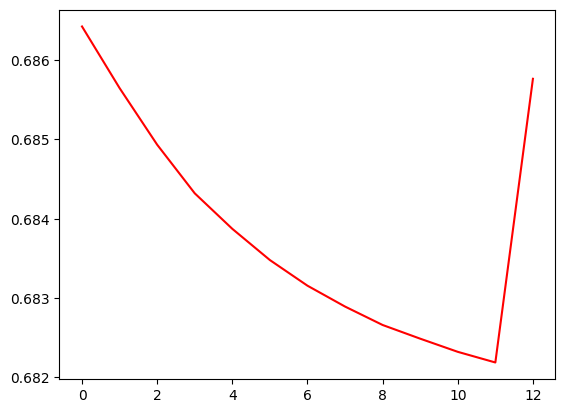

Validation Score


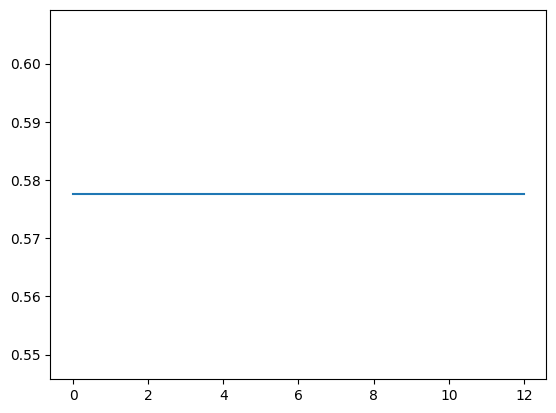

In [48]:
def mlp_classifier(X_train, X_test, y_train, y_test):
    mlps=[]
    labels = [0,1]
    max_iter = 5300

    plot_args = [{'c': 'red', 'linestyle': '-'},{'c': 'green', 'linestyle': '-'}]
    #Initializing the model
    mlp = MLPClassifier(solver='sgd', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter = max_iter, early_stopping=True, warm_start=True)
    with warnings.catch_warnings():
      warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
      mlp.fit(X_train, y_train)
      mlps.append(mlp)
    #Fitting the model on training data
    mlp.fit(X_train, y_train)
    #Predicting the labels values using the test data
    y_pred = mlp.predict(X_test)
    #Evaluating the model
    mlp_accuracy = accuracy_score(y_pred, y_test)
    mlp_classification_report = classification_report(y_pred, y_test)
    mlp_f1 = f1_score(y_pred, y_test)
    #Printing the metrics
    print("Accuracy: ", mlp_accuracy)
    print('\n')
    print("F1 Score: ", mlp_f1)
    print('\n')
    print("Confusion Matrix :") 
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print("Classification Report: \n", mlp_classification_report)

    print("Loss Curve")
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=labels, **args)
    plt.show()   
    print('Validation Score')
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.validation_scores_, label = labels)

    plt.show()

    return mlp


mlp = mlp_classifier(X_train, X_test, y_train, y_test)


In [50]:
# Random Forest with Randomized Search CV

def Random_forest(X_train, X_test, y_train, y_test):
  param_grid = {
      'n_estimators': [50, 100, 200, 500],
      'max_features': ['sqrt', 'log2'],
      'criterion': ['gini', 'entropy', 'log_loss'],
      'max_depth': [None, 10, 20, 30],
      'min_samples_split': [2, 3, 5, 10],
      'min_samples_leaf': [1, 2, 3, 4]
  }

  rf = RandomForestClassifier()
  rand_search = RandomizedSearchCV(rf, param_distributions = param_grid, n_iter = 10)
  rand_search.fit(X_train, y_train)
  best_model = rand_search.best_estimator_
  print('Tuned Hyperparameters :', rand_search.best_params_)
  y_pred = best_model.predict(X_test)
  best_accuracy = accuracy_score(y_test, y_pred)
  best_f1 = f1_score(y_test, y_pred, pos_label = 0)


  print(f'Accuracy: {best_accuracy}')
  print('\n')
  print(f'F1: {best_f1}')
  print('\n')
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))

  return best_model

random_forest_model = Random_forest(X_train, X_test, y_train, y_test)

Tuned Hyperparameters : {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss'}
Accuracy: 0.8035003977724742


F1: 0.831858407079646


Confusion Matrix:
[[1222  247]
 [ 247  798]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83      1469
         1.0       0.76      0.76      0.76      1045

    accuracy                           0.80      2514
   macro avg       0.80      0.80      0.80      2514
weighted avg       0.80      0.80      0.80      2514



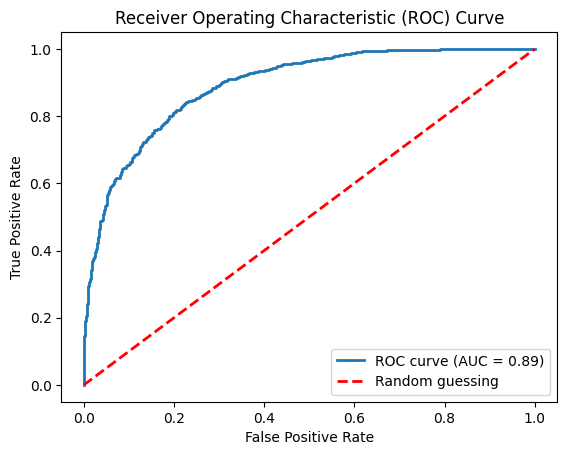

In [51]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_prob = random_forest_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Random guessing')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [52]:
# Random Forest with PCA

def pca_random_forest(X_train, X_test, y_train, y_test):
    pca = PCA(n_components = 3)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    rf = RandomForestClassifier()
    rf.fit(X_train_pca, y_train)
    y_pred = rf.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average = 'weighted')

    return rf, y_pred, accuracy, f1, X_test_pca

model, y_pred, accuracy, f1, X_test_pca = pca_random_forest(X_train, X_test, y_train, y_test)

print(f'Accuracy: {accuracy}')
print(f'F1 score: {f1}')

Accuracy: 0.7350835322195705
F1 score: 0.7345768835281299


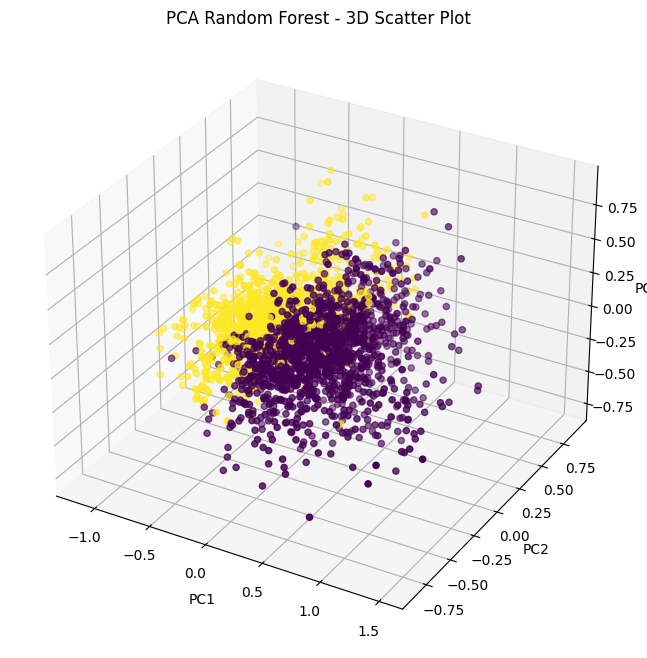

In [53]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot the data points colored by their predicted class
ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], X_test_pca[:, 2], c=y_pred)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA Random Forest - 3D Scatter Plot')

plt.show()


In [54]:
# Logistic Regression with Grid Search CV

warnings.filterwarnings('ignore')

def LogisticRegressionGridCV(X_train, X_test, y_train, y_test):
    # parameter grid
    parameters = {
        'penalty': ('l1', 'l2', 'elasticnet', None),
        'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
        'fit_intercept': (True, False),
        'class_weight': ('balanced', 1)
        }

    logreg = LogisticRegression()
    clf = GridSearchCV(logreg,                    # model
                      param_grid = parameters,   # hyperparameters
                      scoring = 'accuracy',        # metric for scoring
                      cv = 3)  
    clf.fit(X_train,y_train)
    print('Tuned Hyperparameters:', clf.best_params_)
    best_model=clf.best_estimator_
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label = 0)
    print(f'Accuracy: {best_accuracy}')
    print('\n')
    print(f'F1: {best_f1}')
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    return best_model

lr_gridcv_model = LogisticRegressionGridCV(X_train, X_test, y_train, y_test)

Tuned Hyperparameters: {'class_weight': 'balanced', 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy: 0.773667462211615


F1: 0.7971479500891265


Confusion Matrix:
[[1118  351]
 [ 218  827]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.76      0.80      1469
         1.0       0.70      0.79      0.74      1045

    accuracy                           0.77      2514
   macro avg       0.77      0.78      0.77      2514
weighted avg       0.78      0.77      0.78      2514



<Axes: xlabel='expected_num_matches', ylabel='decision'>

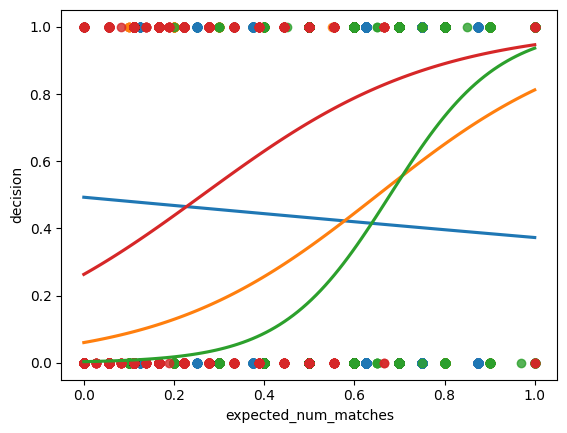

In [55]:
sns.regplot(x = X_test['attractive'], y = y_test, data = data, logistic = True, ci = None, label = 'attractive')
sns.regplot(x = X_test['shared_interests_partner'], y = y_test, data = data, logistic = True, ci = None)
sns.regplot(x = X_test['like'], y = y_test, data = data, logistic = True, ci = None)
sns.regplot(x = X_test['expected_num_matches'], y = y_test, data = data, logistic = True, ci = None)


In [62]:
# SVM with GridSearchCV

def SVMGridSearch(X_train, X_test, y_train, y_test):
  svm_model = SVC(gamma = 'auto')
  params = {
      'degree': (1, 2, 3, 4, 5),
      'kernel': ('linear', 'poly', 'rbf', 'sigmoid'),
      #'solver': ('lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'),
      'probability': (True, False),
      'class_weight': ('balanced', 1)
      }
  svm_grid = GridSearchCV(svm_model, param_grid = params, scoring = 'accuracy', cv = 3)
  svm_grid = svm_grid.fit(X_train.to_numpy(), y_train)
  
  # We obtain the ideal parameters
  print("Tuned Hyperparameters :", svm_grid.best_params_)
  best_model=svm_grid.best_estimator_
  y_pred = best_model.predict(X_test)
  best_accuracy = accuracy_score(y_test, y_pred)
  best_f1 = f1_score(y_test,y_pred, pos_label = 0)
  print(f'Accuracy: {best_accuracy}')
  print('\n')
  print(f'F1: {best_f1}')
  print('\n')
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))

  return best_model

svm_grid_model = SVMGridSearch(X_train, X_test, y_train, y_test)

Tuned Hyperparameters : {'class_weight': 'balanced', 'degree': 1, 'kernel': 'linear', 'probability': True}
Accuracy: 0.7720763723150358


F1: 0.7939590075512405


Confusion Matrix:
[[1104  365]
 [ 208  837]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.75      0.79      1469
         1.0       0.70      0.80      0.74      1045

    accuracy                           0.77      2514
   macro avg       0.77      0.78      0.77      2514
weighted avg       0.78      0.77      0.77      2514



In [63]:
# K-Nearest Neighbors with GridSearchCV 

def KNNGridSearchCV(X_train, X_test, y_train, y_test):
    estimator_KNN = KNeighborsClassifier(algorithm = 'auto')
    parameters_KNN = {
    'n_neighbors': [3,5,11,19],
    'weights': ['uniform', 'distance'],
    'metric': ['minkowski', 'euclidean','cosine','manhattan'],
    }

    # with GridSearch
    grid_search_KNN = GridSearchCV(
    estimator = estimator_KNN,
    param_grid = parameters_KNN,
    scoring = 'accuracy',
    n_jobs = -1,
    cv = 10
    )
    grid_search_KNN.fit(X_train, y_train)
    print('Tuned Hyperparameters :', grid_search_KNN.best_params_)
    best_model = grid_search_KNN.best_estimator_
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label = 0)
    print(f'Accuracy: {best_accuracy}')
    print('\n')
    print(f'F1: {best_f1}')
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    return best_model

knn_grid_model = KNNGridSearchCV(X_train, X_test, y_train, y_test)

Tuned Hyperparameters : {'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'distance'}
Accuracy: 0.8158313444709626


F1: 0.8434223875549542


Confusion Matrix:
[[1247  222]
 [ 241  804]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.85      0.84      1469
         1.0       0.78      0.77      0.78      1045

    accuracy                           0.82      2514
   macro avg       0.81      0.81      0.81      2514
weighted avg       0.82      0.82      0.82      2514



In [64]:
# Naive Bayes

def NaiveBayes(X_train, X_test, y_train, y_test):
  GNBclf = GaussianNB()
  gnb_model = GNBclf.fit(X_train, y_train)
  y_pred = gnb_model.predict(X_test)
  best_accuracy = accuracy_score(y_test, y_pred)
  best_f1 = f1_score(y_test, y_pred, pos_label = 0)
  print(f'Accuracy: {best_accuracy}')
  print('\n')
  print(f'F1: {best_f1}')
  print('\n')
  print('Confusion Matrix:')
  print(confusion_matrix(y_test, y_pred))
  print('\n')
  print('Classification Report:')
  print(classification_report(y_test, y_pred))
  return gnb_model

gnb_model = NaiveBayes(X_train, X_test, y_train, y_test)

Accuracy: 0.7287191726332538


F1: 0.7490802060338485


Confusion Matrix:
[[1018  451]
 [ 231  814]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.69      0.75      1469
         1.0       0.64      0.78      0.70      1045

    accuracy                           0.73      2514
   macro avg       0.73      0.74      0.73      2514
weighted avg       0.74      0.73      0.73      2514



In [65]:
# Random Forest with Bagging

def BaggingClassifier_predict(X_train, X_test, y_train, y_test):
    # parameters = {
    #     'n_estimators': [5, 10, 20],
    #     'max_samples': [0.5, 1.0],
    #     'max_features': [0.5, 1.0],
    #     'bootstrap': [True, False],
    #     'bootstrap_features': [True, False]
    # }
    rf = RandomForestClassifier()
    bag_clf = BaggingClassifier(base_estimator = rf)
    # clf = GridSearchCV(bag_clf,                    # model
    #                   param_grid = parameters,     # hyperparameters
    #                   scoring='accuracy')          # metric for scoring 
    bag_clf.fit(X_train, y_train)
    # print("Tuned Hyperparameters :", clf.best_params_)
    best_model = bag_clf
    y_pred = best_model.predict(X_test)
    best_accuracy = accuracy_score(y_test, y_pred)
    best_f1 = f1_score(y_test, y_pred, pos_label = 0)
    print(f'Accuracy: {best_accuracy}')
    print('\n')
    print(f'F1: {best_f1}')
    print('\n')
    print('Confusion Matrix:')
    print(confusion_matrix(y_test, y_pred))
    print('\n')
    print('Classification Report:')
    print(classification_report(y_test, y_pred))

    return best_model

bagging_model = BaggingClassifier_predict(X_train, X_test, y_train, y_test)

Accuracy: 0.8066825775656324


F1: 0.8363636363636364


Confusion Matrix:
[[1242  227]
 [ 259  786]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.85      0.84      1469
         1.0       0.78      0.75      0.76      1045

    accuracy                           0.81      2514
   macro avg       0.80      0.80      0.80      2514
weighted avg       0.81      0.81      0.81      2514



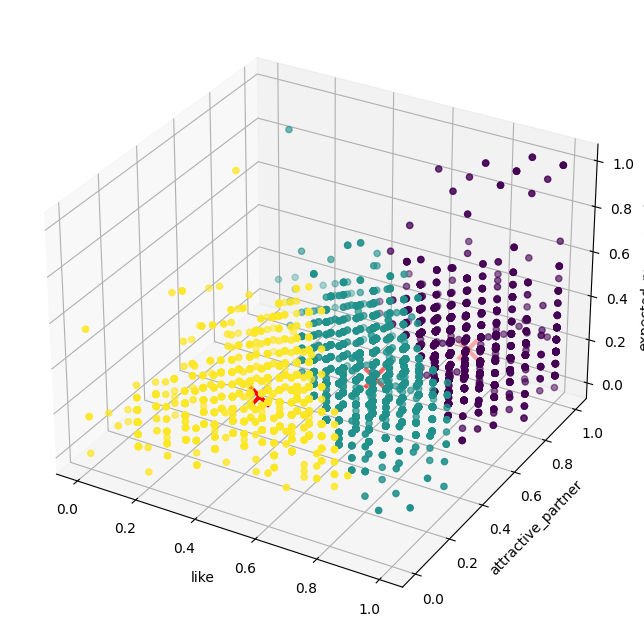

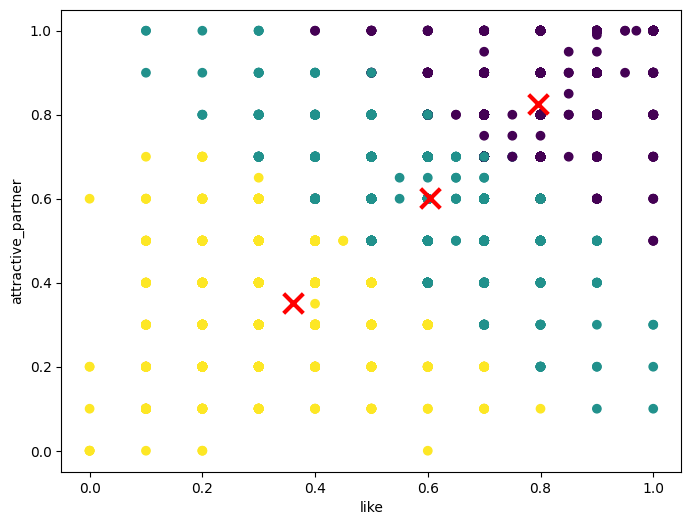

shared_interests_partner  guess_prob_liked      like  \
cluster                                                         
0                        0.686517          0.618132  0.795423   
1                        0.548488          0.511061  0.604300   
2                        0.369828          0.396658  0.361649   

         expected_num_matches  attractive_partner  funny_partner  \
cluster                                                            
0                    0.214799            0.824670       0.786117   
1                    0.163273            0.602664       0.639063   
2                    0.156358            0.351432       0.435232   

         ambition_partner  sincere_partner  attractive_o     funny  \
cluster                                                              
0                0.761885         0.810496      0.593165  0.789290   
1                0.673318         0.709255      0.583573  0.764947   
2                0.573043         0.597040      0.598557  0.761844   

         intelligence     d_age  attractive  attractive_important    sports  
cluster                                                                      
0            0.738536  0.114316    0.649032              0.230430  0.618240  
1            0.706038  0.113465    0.626467              0.222330  0.600251  
2            0.696770  0.110362    0.640277              0.223829  0.589858

In [66]:
# KMeans Clustering

def plot_clusters(df, columns, n_clusters):
    # Initialize the KMeans object and fit the data
    kmeans = KMeans(n_clusters = n_clusters)
    kmeans.fit(df[columns])
    labels = kmeans.predict(df[columns])
    df['cluster'] = labels

    # Plot the 3D scatterplot
    fig = plt.figure(figsize = (10, 8))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(df[columns[0]], df[columns[1]], df[columns[2]], c = df['cluster'], cmap = 'viridis')
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], centers[:, 2], marker = 'x', s = 200, linewidths = 3, color = 'r')
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    ax.set_zlabel(columns[2])
    plt.show()

    # Plot the 2D scatterplot
    fig, ax = plt.subplots(figsize = (8, 6))
    ax.scatter(df[columns[0]], df[columns[1]], c = df['cluster'], cmap = 'viridis')
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], marker = 'x', s = 200, linewidths = 3, color = 'r')
    ax.set_xlabel(columns[0])
    ax.set_ylabel(columns[1])
    plt.show()

    return df.groupby('cluster').mean()


X_cluster = X_scaled_15[['like', 'attractive_partner', 'expected_num_matches']]
plot_clusters(X_scaled_15, ['like', 'attractive_partner', 'expected_num_matches'], 3)

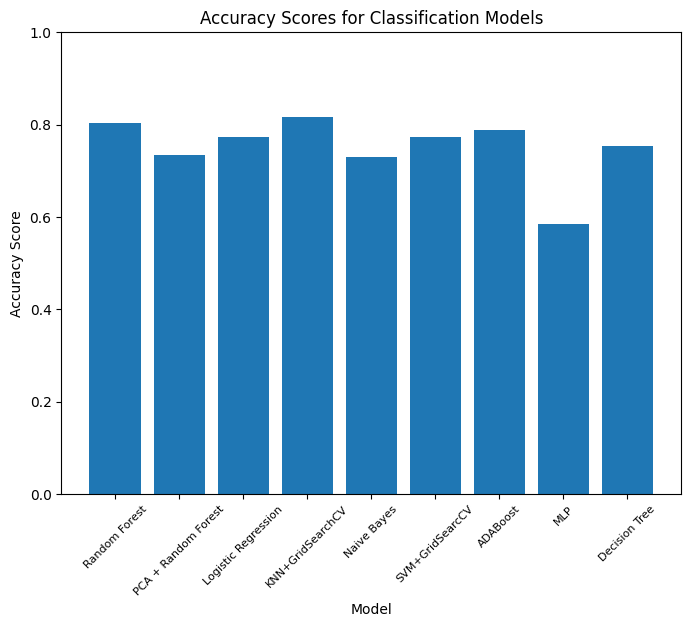

In [68]:
# Calculate the accuracy scores for each model

rf_acc = accuracy_score(y_test, random_forest_model.predict(X_test))
pca_rf_acc = accuracy_score(y_test, model.predict(X_test_pca))
logreg_acc = accuracy_score(y_test, lr_gridcv_model.predict(X_test))
knn_acc = accuracy_score(y_test, knn_grid_model.predict(X_test)) 
gnb_acc = accuracy_score(y_test, gnb_model.predict(X_test))
ada_acc = accuracy_score(y_test, adaboost_classifier.predict(X_test))
svm_acc = accuracy_score(y_test, svm_grid_model.predict(X_test))
mlp_acc = accuracy_score(y_test, mlp.predict(X_test)) 
dt_acc = accuracy_score(y_test, d_tree.predict(X_test)) 


# Create a bar plot of the accuracy scores
models = ['Random Forest', 'PCA + Random Forest', 'Logistic Regression', 'KNN+GridSearchCV','Naive Bayes','SVM+GridSearcCV','ADABoost','MLP','Decision Tree']
accuracy_scores = [rf_acc, pca_rf_acc, logreg_acc, knn_acc,gnb_acc,svm_acc,ada_acc,mlp_acc,dt_acc]

plt.figure(figsize=(8,6))
plt.bar(models, accuracy_scores)
plt.title('Accuracy Scores for Classification Models')
plt.xlabel('Model')
plt.xticks(rotation = 45,fontsize=8)
plt.ylabel('Accuracy Score')
plt.ylim([0, 1])
plt.show()